<a href="https://colab.research.google.com/github/Neoneto/Diamond_Analysis/blob/main/Selling_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Selling Price Prediction
Using supervised machine learning, a predictive model was created to estimate how much a diamond can be sold based on its properties.

Using Supervised Machine Learning


In [ ]:
# import libraries
import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


# Preparing the data for the model

In [ ]:
# Load the data

## Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

## Opening the file
filename = '/content/drive/My Drive/Coding Dojo/Diamonds/diamonds_preprocessed.csv'

## Storing the data in df
df = pd.read_csv(filename, )

# display first few rows
df.head()

Mounted at /content/drive


,Id,Shape,Weight,Clarity,color_grade,Cut,Polish,Symmetry,Fluorescence,Price,max_width,min_width,depth,price_per_carat
0,1638147,CUSHION,0.55,SI2,E,EX,EX,VG,N,1378.65,5.05,4.35,2.94,2506.636364
1,1630155,CUSHION,0.50,VVS1,FANCY,EX,EX,VG,F,1379.74,4.60,4.31,2.92,2759.480000
2,1612606,CUSHION,0.51,VS2,H,EX,EX,VG,N,1380.19,4.71,4.35,2.94,2706.254902
3,1638140,CUSHION,0.50,VS2,H,EX,EX,VG,N,1380.61,4.91,4.26,2.88,2761.220000
4,1536093,CUSHION,0.53,SI1,D,EX,VG,VG,N,1383.13,4.70,4.46,3.01,2609.679245


In [ ]:
# define targets and Features

X = df.drop(columns = ['Id', 'Price', 'price_per_carat'])
y = df['Price']


## Encode Categorical Columns
Similar to the second part (Data Visualizations)

In [ ]:
# Ranking for some properties
# From least to most desirable

'''
Clarity grades
I = included
SI = slightly included
VS = Very slightly included
VVS = very very slightly included
IF = internally flawless
'''
clarity_order = ['I3','I2','I1','SI2','SI1','VS2', 'VS1','VVS2',   'VVS1',    'IF',  'FL']


'''
Fluorescence grade
N = None
F - faint
M - Medium
S - Strong
VS = Very strong

'''
fluoro_order = [ 'SL','VSL','VS','ST','M','F','N',     ]


'''
Cut scale
F = fair
GD = good
VG = very good
EX = excellent 
'''
cut_order = ['F', 'GD', 'VG', 'EX']

'''
Symmetry scale
FR = fair
GD = good
VG = very good
EX = excellent 
'''
symm_order = ['FR', 'GD', 'VG', 'EX']

'''
Polish scale
F = fair
GD = good
VG = very good
EX = excellent 
'''
polish_order = ['F', 'GD', 'VG', 'EX']

# Copy the dataframe and encode the categorical columns


color_scale = {'Y-Z': 0,
               'W-X': 1,
               'W': 1,
               'U-V': 2,
               'S-T': 3,
               'Q-R': 4,
               'O-P': 5,
               'O': 5,
               'N': 6,
               'M': 7,
               'L': 8,
               'K': 9,
               'J': 10,
               'I': 11,
               'H': 12,
               'G': 13,
               'F': 14,
               'E': 15,
               'D': 16,
               'FANCY': 17}

# Encode the color grade column according to the scale
X.color_grade.replace(color_scale, inplace = True)

# According to clarity scale
temp_index = np.arange(len(clarity_order))
temp_dict = dict(zip(clarity_order, temp_index))
X.Clarity.replace(temp_dict, inplace = True)

# According to Fluorescence scale
temp_index = np.arange(len(fluoro_order))
temp_dict = dict(zip(fluoro_order, temp_index))
X.Fluorescence.replace(temp_dict, inplace = True)

# According to cut scale
temp_index = np.arange(len(cut_order))
temp_dict = dict(zip(cut_order, temp_index))
X.Cut.replace(temp_dict, inplace = True)

# According to symmetry scale
temp_index = np.arange(len(symm_order))
temp_dict = dict(zip(symm_order, temp_index))
X.Symmetry.replace(temp_dict, inplace = True)

# According to cut scale
temp_index = np.arange(len(polish_order))
temp_dict = dict(zip(polish_order, temp_index))
X.Polish.replace(temp_dict, inplace = True)


for c_name in X.columns:
  if X[c_name].dtypes == 'O':
    categories = X[c_name].unique()
    codes = np.arange(len(categories))
    temp_dict = dict(zip(categories, codes))

    X[c_name].replace(temp_dict, inplace = True)

    # Print the mapping used, for tracking
    print(c_name)
    print(temp_dict)


Shape
{'CUSHION': 0, 'HEART': 1, 'MARQUISE': 2, 'OVAL': 3, 'PEAR': 4, 'PRINCESS': 5, 'EMERALD': 6, 'ROUND': 7}


# Supervised ML

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42)

In [ ]:
# Instantiate the model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
reg =  RandomForestRegressor(n_estimators=100, random_state = 42)#LinearRegression()

In [ ]:
# Train the model
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# r2 score for test set
r2_test = reg.score(X_test, y_test)
print(f'The model, evaluated on the test set has a R2 score of {r2_test:.3f}')

The model, evaluated on the test set has a R2 score of 0.836


In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# calculate the RMSE between the y_test and the predictions of the model using
# features of the test set 
rmse = np.sqrt( mean_squared_error(y_test, reg.predict(X_test)) )
print(f'The RMSE of the model (evaluated on the test set) is {rmse:.3f}')

The RMSE of the model (evaluated on the test set) is 1916.322


# Visualize the Model
Create a density plot to visualize the total price of different dimensions of diamond. 

In [ ]:
# Get the mode of each column
X.mode()

,Shape,Weight,Clarity,color_grade,Cut,Polish,Symmetry,Fluorescence,max_width,min_width,depth
0,7.0,0.5,4.0,15.0,3.0,3.0,2.0,6.0,5.08,5.05,3.17
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.06,NaN


In [ ]:
# Set the property of a diamond as constant based on the mode
# Create a dataframe of different dimensions
pred_df = pd.DataFrame()

# Create a grid of dimensions
widths = np.linspace(1,10, 100)
depths = np.linspace(1,7,  100)

[ws, ds] = np.meshgrid(widths, depths)
pred_df['Shape'] = [0]*100*100
pred_df['Weight'] = [0.622]*100*100
pred_df['Clarity'] = [4]*100*100
pred_df['color_grade'] = [15]*100*100
pred_df['Cut'] = [3]*100*100
pred_df['Polish'] = [3]*100*100
pred_df['Symmetry'] = [2]*100*100
pred_df['Fluorescence'] = [6]*100*100

pred_df['max_width'] = ws.reshape(100*100)
pred_df['min_width'] = ws.reshape(100*100)
pred_df['depth'] = ds.reshape(100*100)
pred_df.head()

,Shape,Weight,Clarity,color_grade,Cut,Polish,Symmetry,Fluorescence,max_width,min_width,depth
0,0,0.622,4,15,3,3,2,6,1.000000,1.000000,1.0
1,0,0.622,4,15,3,3,2,6,1.090909,1.090909,1.0
2,0,0.622,4,15,3,3,2,6,1.181818,1.181818,1.0
3,0,0.622,4,15,3,3,2,6,1.272727,1.272727,1.0
4,0,0.622,4,15,3,3,2,6,1.363636,1.363636,1.0


In [ ]:
# generate predictions using the model
df_predictictions = reg.predict(pred_df)

In [ ]:
# Define the columns to be used for the plot
df9 = pd.DataFrame()
df9['X'] = pred_df.max_width
df9['Y'] = pred_df.depth
df9['Z'] = df_predictictions
df9.head()


,X,Y,Z
0,1.000000,1.0,1419.18095
1,1.090909,1.0,1419.18095
2,1.181818,1.0,1419.18095
3,1.272727,1.0,1419.18095
4,1.363636,1.0,1419.18095


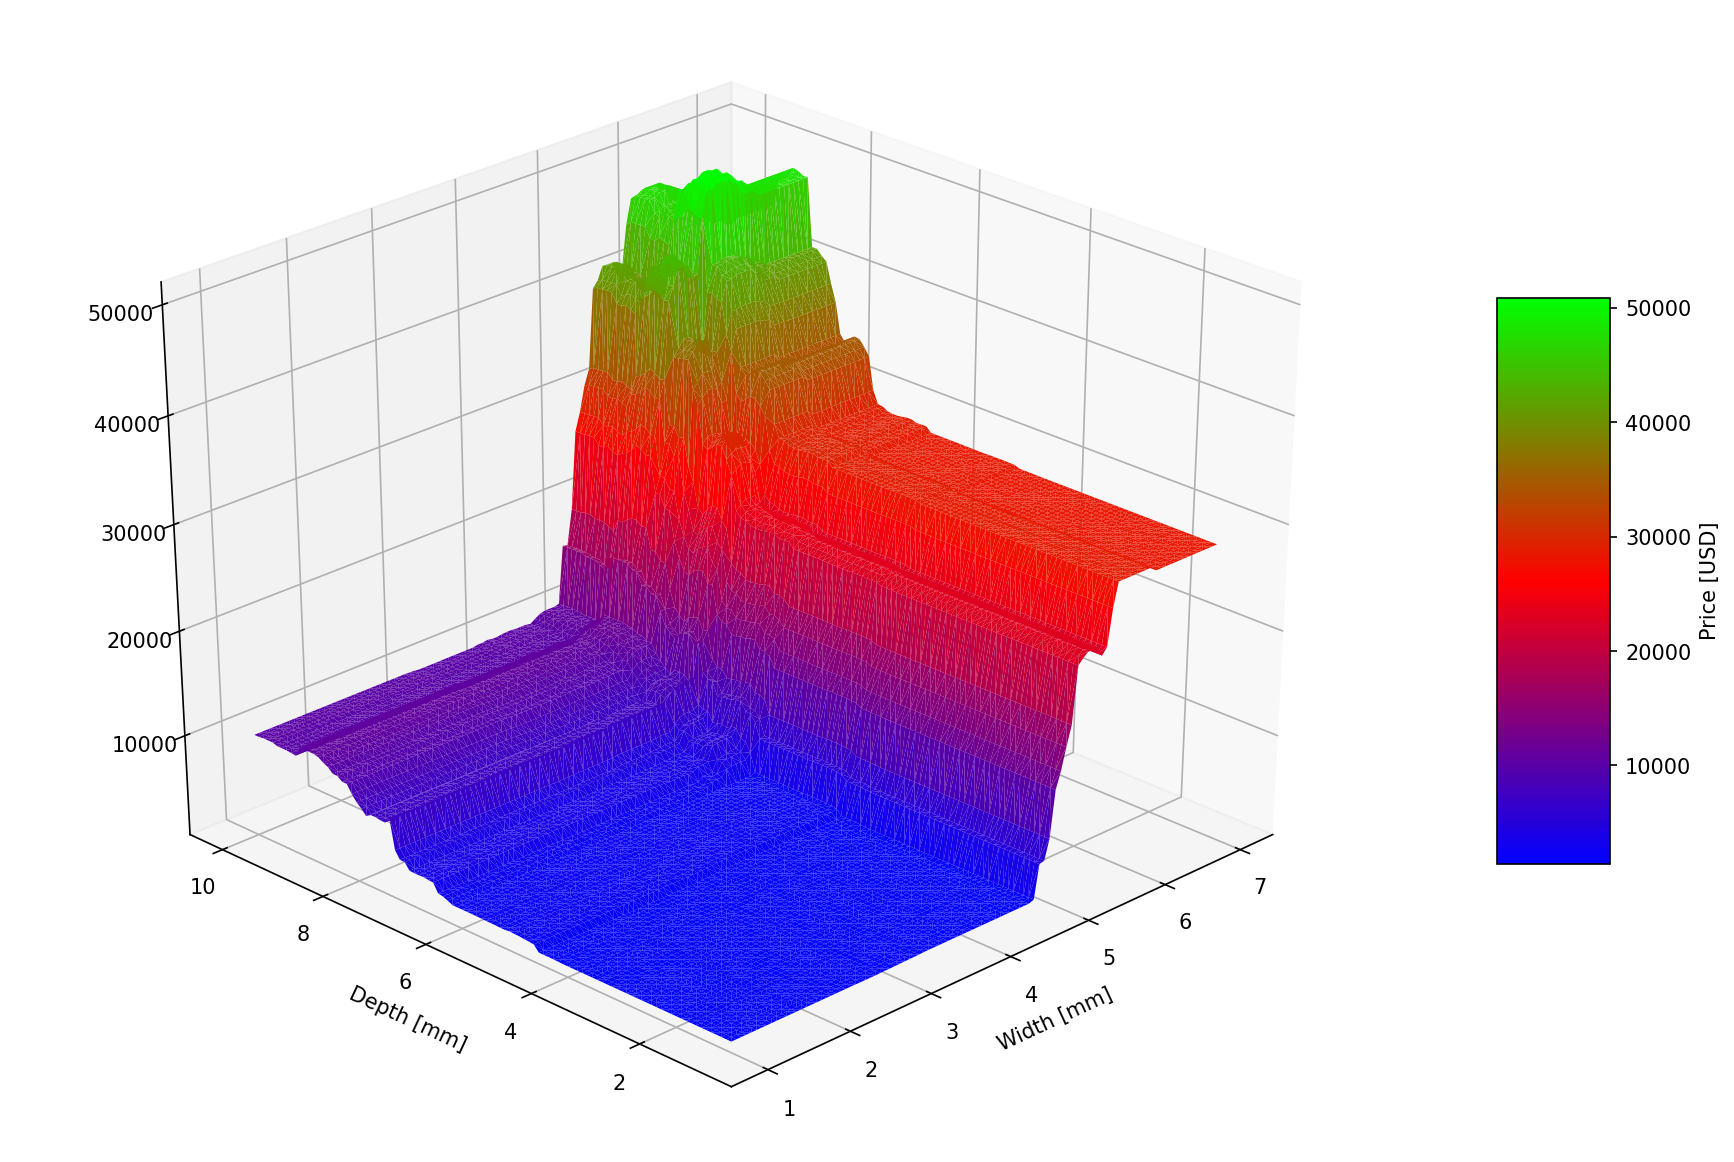

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



# Create a density plot

fig = plt.figure(figsize = (15,10), dpi = 150)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(df9['Y'], df9['X'], df9['Z'], cmap='brg', linewidth=0.2)
plt.xlabel('Width [mm]')
plt.ylabel('Depth [mm]')
fig.colorbar( surf, shrink=0.5, aspect=5, label = 'Price [USD]')
ax.view_init(30, 45+180)
plt.show()

Text(0, 0.5, 'Depth')

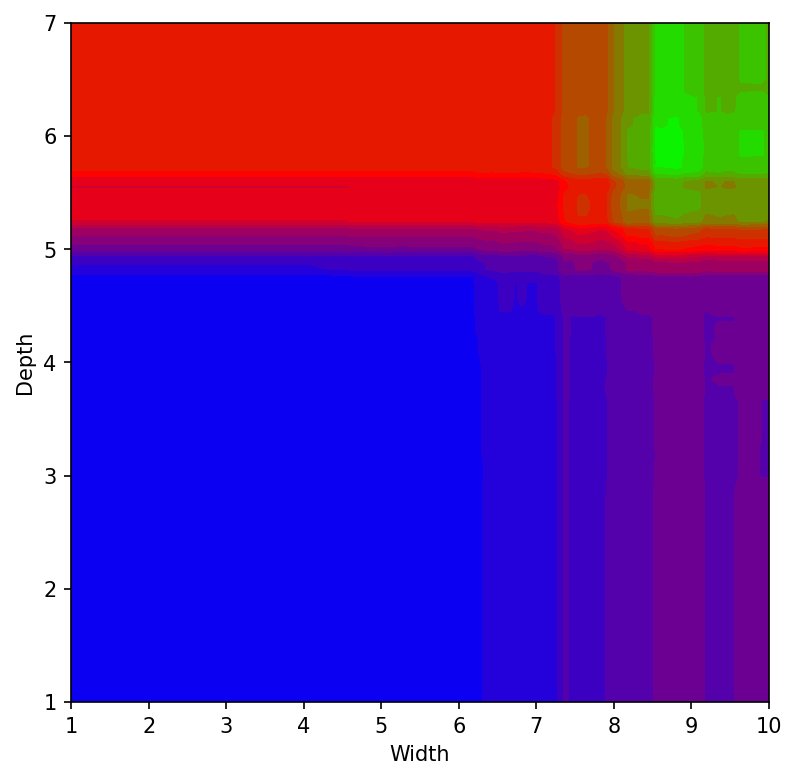

In [ ]:
# Generate a different view of the plot
plt.figure(figsize = (6,6), dpi = 150)
plt.contourf(ws, ds, df_predictictions.reshape(int(np.sqrt(len(df_predictictions))), int(np.sqrt(len(df_predictictions)))), 20, cmap='brg')
#plt.colorbar();
plt.xlabel('Width')
plt.ylabel('Depth')

NameError: ignored

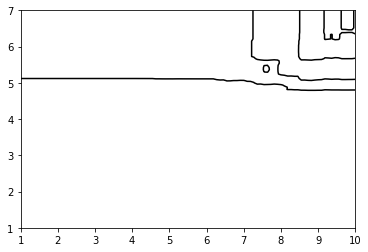

In [ ]:
plt.contour(ws, ds, df_predictictions.reshape(int(np.sqrt(len(df_predictictions))), int(np.sqrt(len(df_predictictions)))), 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

Z = df_predictictions.reshape(int(np.sqrt(len(df_predictictions))), int(np.sqrt(len(df_predictictions))))


plt.imshow(Z, extent=[1, 10, 1, 7], origin='lower',
           cmap='RdGy', alpha=0.5)

In [ ]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca(projection='3d')
surf=ax.plot_wireframe(ws, ds, df_predictictions.reshape(int(np.sqrt(len(df_predictictions))), int(np.sqrt(len(df_predictictions)))), cmap='brg', linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
ax.view_init(30, 45+180)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import axes3d
axes3d.get_test_data(0.05)
df_predictictions.reshape(int(np.sqrt(len(df_predictictions))), int(np.sqrt(len(df_predictictions))))

In [ ]:
plt.scatter(df9['Y'], df9['X'], c = df9['Z'], cmap = 'Blues')